# Abalone Case Study

### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

### Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingRegressor

import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Exploratoty Data Analysis - I

In [5]:
data.shape # checking how big is the data

(4177, 9)

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


by looking at data, seem there is no missing value. min value of Height is 0, which shows issues with data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


there is no null values, sex has data type as Object. hence will encode it using Label Encoder

### Label Encoder

In [8]:
lab_enc=LabelEncoder()

In [9]:
df=lab_enc.fit_transform(data['Sex'])

In [10]:
data['Sex']=df

In [11]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Exploratoty Data Analysis - II

use distplot to check skewness and distribution

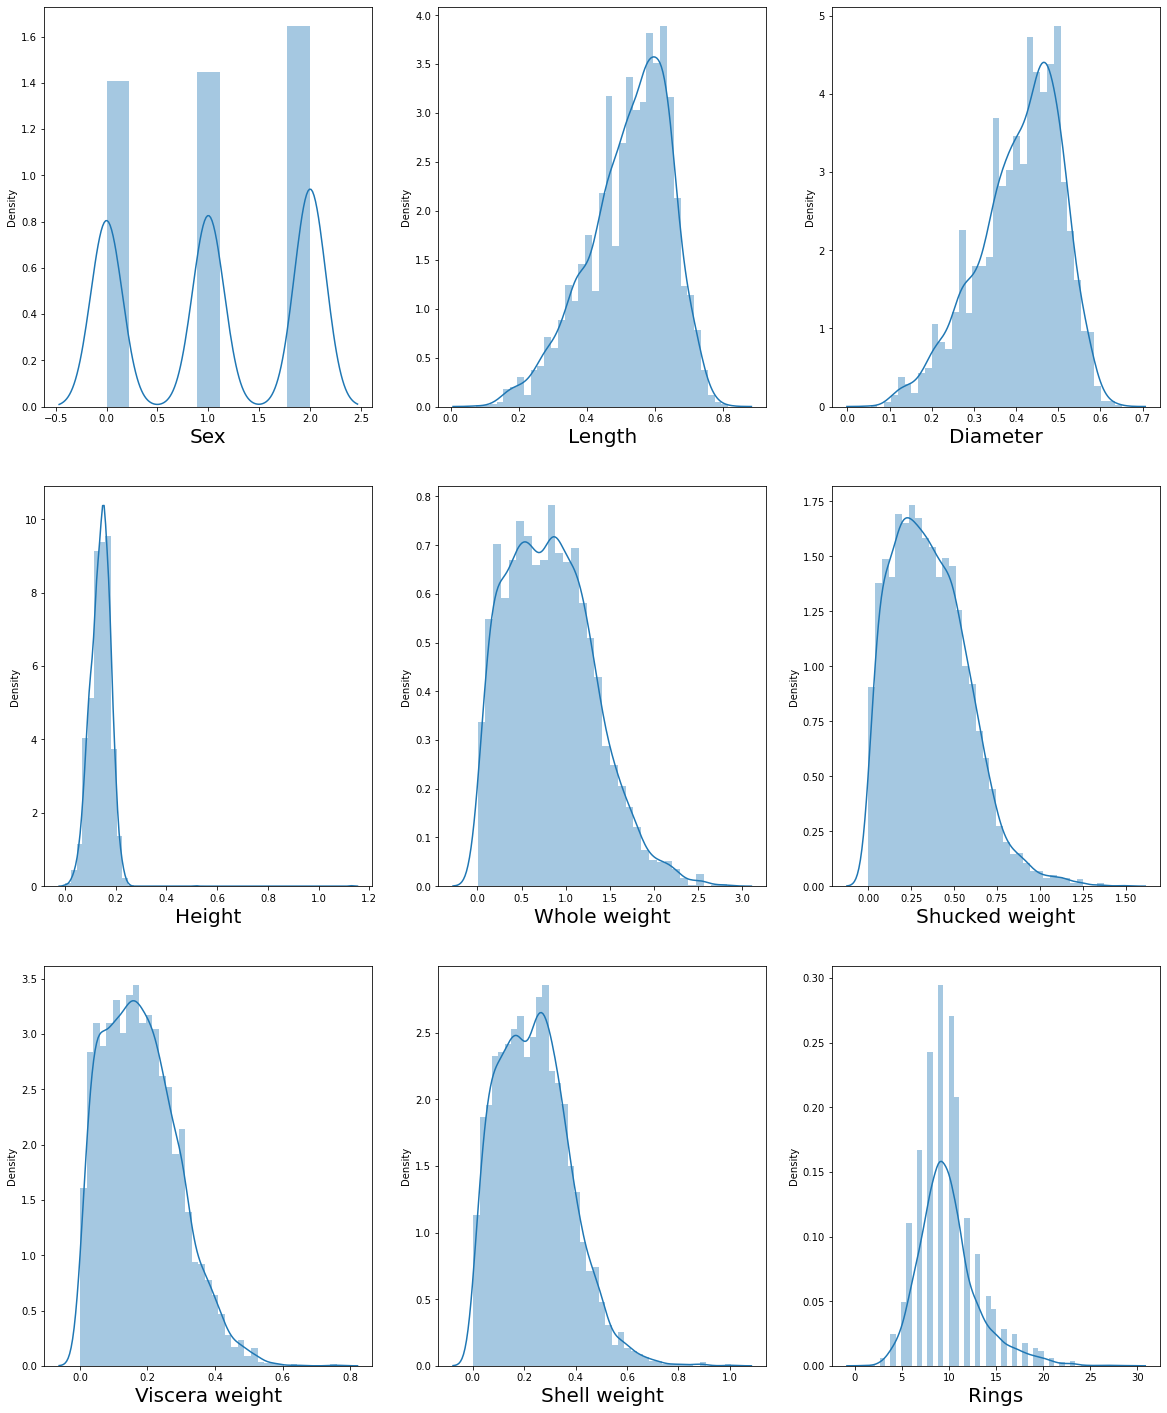

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
# -Sex data is categorical
# -Length looks normally distributed
# -Diameter looks normally distributed
# -Height looks skewed towards the left(0 height of any object looks abnormal, will look at the outliers)
# -whole weight looks normally distributes'Shucked weight looks normally distributed
# -Viscera weight looks normally distributed
# -Shell weight looks normally distributed
# -Rings is the label

checking Outliers

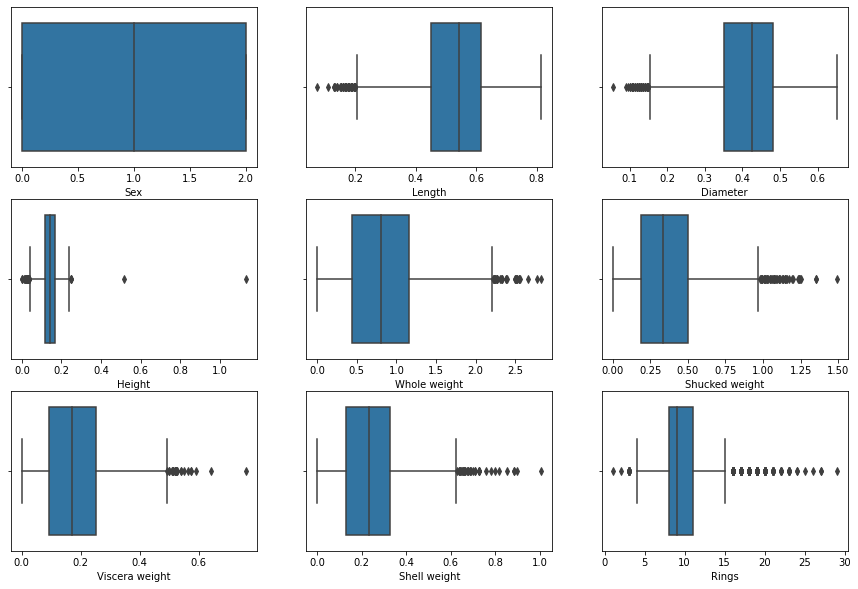

In [16]:
plt.figure(figsize=(15,10))
graph = 1

for column in data:
    if graph<=10:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Outliers are Shucked weight, Viscera weight, Shell weight.

### check corelation

In [19]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

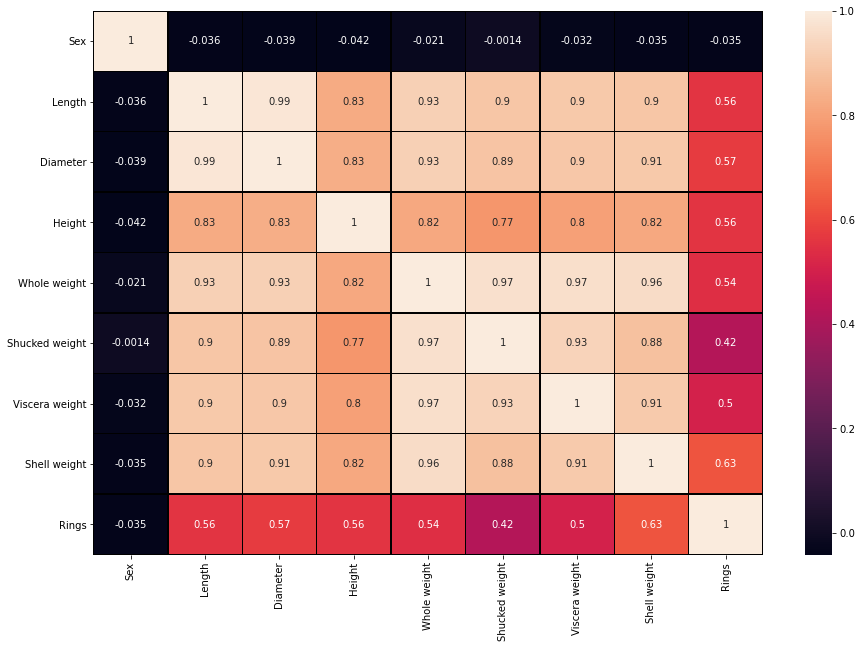

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, linewidths=0.5, linecolor='black')

In [21]:
#Observation of corelation-
#Sex is negatively corelated and has 0.035 relation with the label
#Length and Diameter are both highly corelated 99% corelation
#Whole weight has 96% corelation with Shell weight, 97%co relation with Viscera weight and 97% co-relation with Shucked weight.

In [23]:
#Shucked weight, Viscera weight and Shell weight are highly corelated with whole weight and also has lots of outliers we can consider removing, but since dataset is small, so will see in the modelling.
#Sex is 0.035 corelated , hence we can consider removing this as well, however first will evaluate with a scatterplot.

### Seperating features and label

In [24]:
x= data.drop(columns=['Rings'])
y=data['Rings']

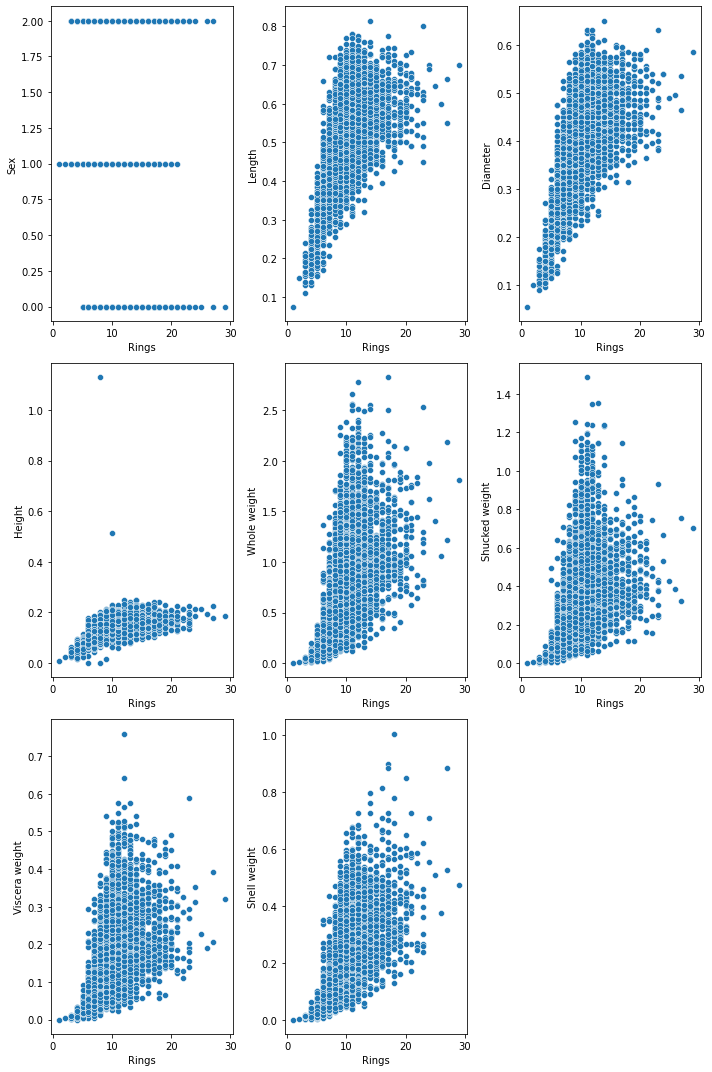

In [25]:
plt.figure(figsize=(10,15), facecolor='white') #checking the relation between feature and label
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


# Modelling

### Scalling data using Standard scaller

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
x_scaled.shape[1]

8

### Splitting data into training and testing set

In [28]:
x_train,x_test, y_train,y_test=train_test_split(x_scaled,y,test_size=0.10,random_state=1000)

In [29]:
print(x_train.shape) #Checking the data distribution
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3759, 8)
(3759,)
(418, 8)
(418,)


### Baseline Model: Multiple Linear Regression

In [34]:
lin_reg=LinearRegression()   #initializing Linear Regression
lin_reg.fit(x_train,y_train) # training the model with the training data

LinearRegression()

In [35]:
#Testing RMSE
lin_reg_pred=lin_reg.predict(x_test)
test_rmse=mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE:---{test_rmse}')

Test RMSE:---2.2429787082902877


In [36]:
y_pred=lin_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))
mean_absolute_error(y_test,y_pred)

1.666452245783077

In [37]:
filename='Abalone_Model_1'
pickle.dump(lin_reg,open(filename, 'wb'))

### Multiple Linear Regression with Ridge Regression

In [38]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [39]:
ridgecv.alpha_

0.001

In [40]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [41]:
ridge_model.score(x_test,y_test)

0.5186479841328381

### Multiple Linear Regression with Lasso Regression

In [42]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [43]:
alpha=lasscv.alpha_
alpha

3.298828017174244e-05

In [44]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.298828017174244e-05)

In [45]:
lasso_reg.score(x_test,y_test)

0.5186718770948758

### TREE Based Model

In this model we will consider dropping some features which are highly co-related Length and Diameter is highly corelated by 99%, hence will consider dropping Diameter. Whole_weight is highly corelated to shucket weight, viscera weight and shell weight and will keep only whole weight

In [46]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [47]:
# dropping features as mentioned above and splitting the data in feature and label

x=data.drop(['Rings','Diameter','Shucked weight','Viscera weight','Shell weight'],axis=1)
y=data['Rings'].values.reshape(-1,1)

### RandomForest Model

In [48]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=42) #splitting dataset into test and train data

In [49]:
rf= RandomForestRegressor() # initializing RandomForest regressor

In [50]:
parameters ={'n_estimators':[int(x) for x in np.linspace(100,1000,10)]} #Determining parameters

In [52]:
rf_regressor=GridSearchCV(rf,parameters,scoring='neg_mean_squared_error',cv=5) #process GridSearchCV to get best params and score

In [53]:
rf_regressor.fit(x_train,y_train) #training to model to get the best param and score

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [55]:
print(rf_regressor.best_params_) #best param

{'n_estimators': 800}


In [56]:
print(-rf_regressor.best_score_) #best score

7.024147519393774


In [57]:
rf_reg = RandomForestRegressor(n_estimators=800)  #Training the model with the best params and scores received with Grid SearchCV
rf_reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=800)

In [58]:
rf_reg_pred=rf_reg.predict(x_test) #Predicting the results
test_rmse=mean_squared_error(y_test,rf_reg_pred,squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.7193918324001136


Results of Random Forest is worse then the basic linerRegression Model, so will check bagging

### Bagging

In [59]:
bg=BaggingRegressor()

In [60]:
parameters: {'n_estimators':[int(x) for x in np.linspace(10,1000,10)],
            'max_samples':[float(x) for x in np.arange(0.1,1.1,0.1)]}

In [61]:
bg_regressor=GridSearchCV(bg,parameters,scoring='neg_mean_squared_error',cv=5)
bg_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [62]:
print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'n_estimators': 1000}
7.036457890671658


In [63]:
bg_reg=BaggingRegressor(n_estimators=600)
bg_reg.fit(x_train,y_train)

BaggingRegressor(n_estimators=600)

In [64]:
bg_reg_pred=bg_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,bg_reg_pred,squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.7195031851836973


In [67]:
Model_Scores ={'Models':['Mulitiple Linear Regression','Ridge Regression', 'Lasso Regression', 'Random Forest','Bagging'],
    'RMSE':[1.66645, 0.51864, 0.51867, 2.71939, 2.71950]}

In [68]:
df=pd.DataFrame(data=Model_Scores)
df

,Models,RMSE
0,Mulitiple Linear Regression,1.66645
1,Ridge Regression,0.51864
2,Lasso Regression,0.51867
3,Random Forest,2.71939
4,Bagging,2.71950


based on this, it seems that Ridge Regression showed best results of 0.51864

#### Saving the best model Linear Regression with Ridge

In [69]:
import pickle

In [70]:
filename='Abalone Case Study'
pickle.dump(ridge_model,open(filename, 'wb'))